In [44]:
import numpy as np
from datasets import load_from_disk
import pandas as pd
import pickle
import random

import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.models.tcav.TCAV import get_preds_tcavs

random.seed(17)

# Visualize CAVs
Notebook for investing into TCAVs and CAVs.

Can we figure out why the splits is either 0 or 1 for random, and all woman are at 0. 

In [27]:
PATH_TO_Data = '/work3/s174498/concept_random_dataset/'
concept_name = 'woman'
nr = 0
num_random_set = 500 
desired_class = 1

### Concept CAVs

In [29]:
PATH_concept_cav = PATH_TO_Data+'cavs/concept/'+concept_name+'_linear_classifier_on_layer_' + str(nr)+'_with_'+str(num_random_set)+'random.pkl'
print('cavs concept are saved.')
with open(PATH_concept_cav,'rb') as handle:
  data = pickle.load(handle)
concept_cavs = data['cavs']
acc = data['acc']
print('number of concept cavs:',len(concept_cavs))

cavs concept are saved.
number of concept cavs: 500


### Random CAVs

In [30]:
PATH_random_cav = PATH_TO_Data+'cavs_221208/random/linear_classifier_on_layer_' + str(nr)+'_with_'+str(num_random_set)+'random.pkl'
with open(PATH_random_cav,'rb') as handle:
    data = pickle.load(handle)
cav_random = data['cavs']
acc_random = data['acc']

### Grads

In [31]:
PATH_grad = '/work3/s174498/sst2_dataset/grads_logits/'+'linear_class_'+str(desired_class)+'_layer_'+str(nr)+'.pkl'
with open(PATH_grad,'rb') as handle:
    data = pickle.load(handle)
grads = data['grads']
logits = data['logits']

### Create Dataframe

In [32]:
targets = ['woman', 
'random',
'grads'
]
colors = ['r', 'grey','green']

df_random = pd.DataFrame(cav_random)
df_concept = pd.DataFrame(concept_cavs)
df_grads = pd.DataFrame(grads)

labels = ['woman']*len(df_concept) + ['random'] * len(df_random) + ['grads'] * len(df_grads)
#labels = ['woman']*len(df_concept) + ['grads'] * len(df_grads)

df = pd.concat(
    [df_concept,
    df_random, 
    df_grads
    ], ignore_index = True)

df['label'] = labels

In [33]:
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,:-1].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [35]:
df_principal = pd.DataFrame(data = principalComponents, columns = ['pca 1', 'pca 2'])

<Figure size 640x480 with 0 Axes>

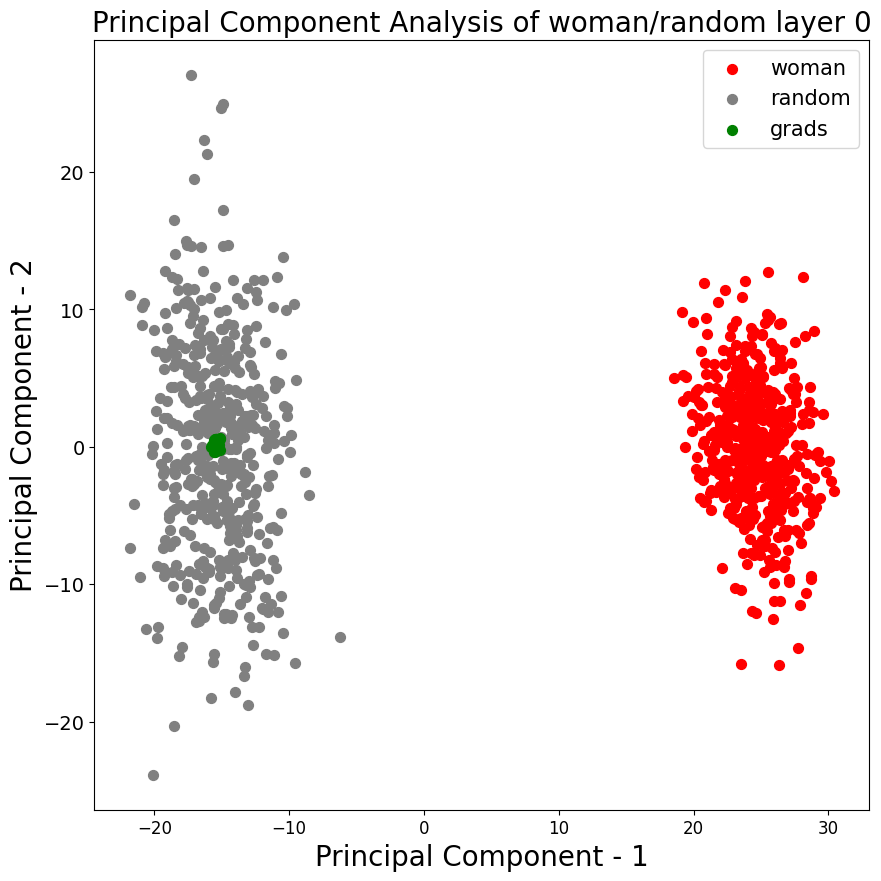

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title(f"Principal Component Analysis of woman/random layer {nr}",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    plt.scatter(df_principal.loc[indicesToKeep, 'pca 1']
               , df_principal.loc[indicesToKeep, 'pca 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of layer 9 on ",fontsize=20)
targets = ['woman', 'random']
colors = ['r', 'grey']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    plt.scatter(df_principal.loc[indicesToKeep, 'pca 1']
               , df_principal.loc[indicesToKeep, 'pca 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Grads 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

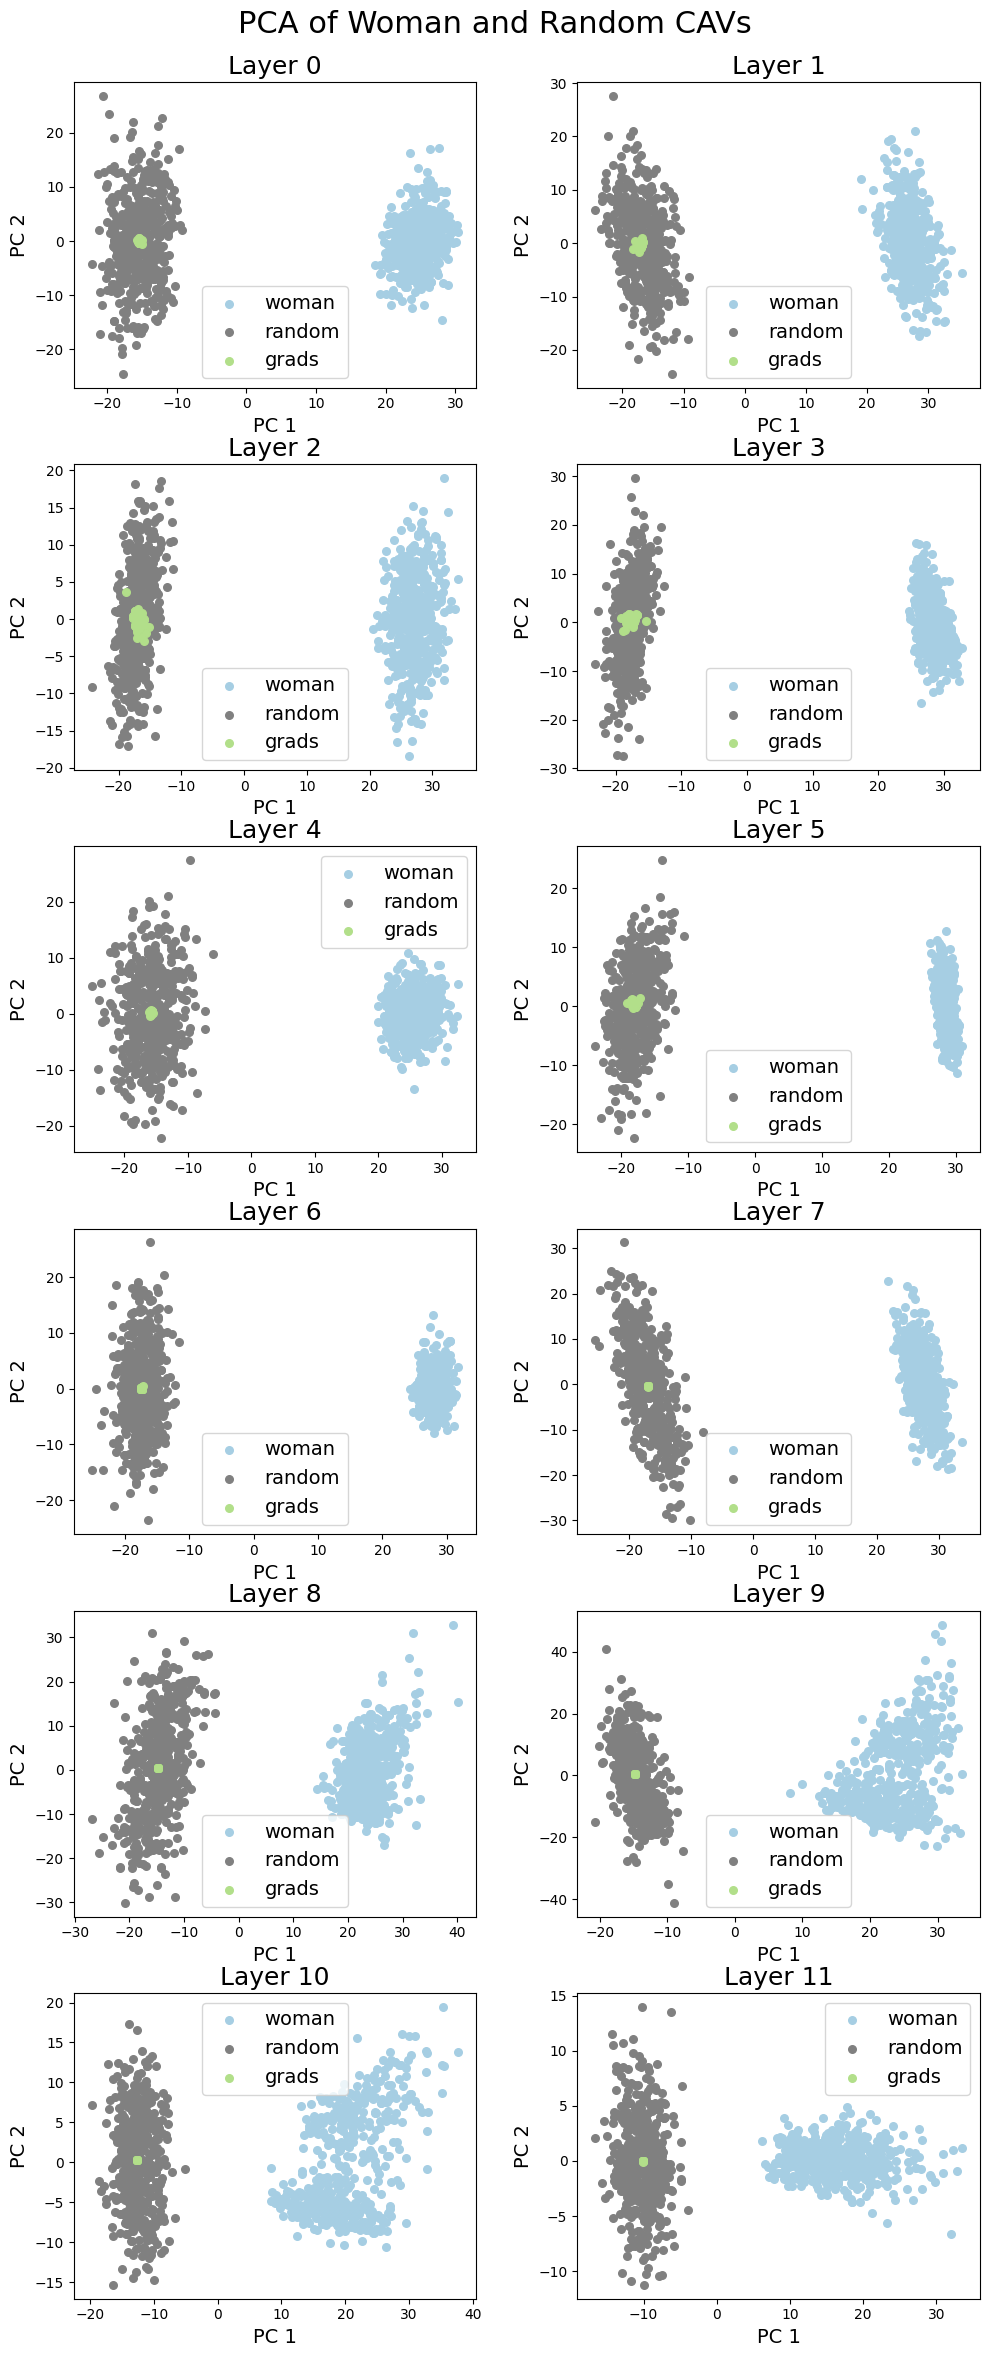

In [90]:
layers = [0,1,2,3,4,5,6,7,8,9,10,11]
PATH_TO_Data = '/work3/s174498/concept_random_dataset/'
concept_name = 'woman'

num_random_set = 500 
desired_class = 1
fig , ax = plt.subplots(nrows=6, ncols=2, figsize=(10,24)); #sharey=True,
fig.suptitle(f'PCA of Woman and Random CAVs', fontsize =22);

for hist_nr in range(len(layers)):
    nr = hist_nr 

    PATH_concept_cav = PATH_TO_Data+'cavs/concept/'+concept_name+'_linear_classifier_on_layer_' + str(nr)+'_with_'+str(num_random_set)+'random.pkl'
    with open(PATH_concept_cav,'rb') as handle:
        data = pickle.load(handle)
    concept_cavs = data['cavs']
    PATH_random_cav = PATH_TO_Data+'cavs/random/linear_classifier_on_layer_' + str(nr)+'_with_'+str(num_random_set)+'random.pkl'
    with open(PATH_random_cav,'rb') as handle:
        data = pickle.load(handle)
    cav_random = data['cavs']
    PATH_grad = '/work3/s174498/sst2_dataset/grads_logits/'+'linear_class_'+str(desired_class)+'_layer_'+str(nr)+'.pkl'
    with open(PATH_grad,'rb') as handle:
        data = pickle.load(handle)
    grads = data['grads']

    targets = ['woman', 'random','grads']
    colors = [sns.color_palette("Paired")[0],'grey',sns.color_palette("Paired")[2]]#'r', 'grey','green']

    df_random = pd.DataFrame(cav_random)
    df_concept = pd.DataFrame(concept_cavs)
    df_grads = pd.DataFrame(grads)

    labels = ['woman']*len(df_concept) + ['random'] * len(df_random) + ['grads'] * len(df_grads)

    df = pd.concat([df_concept,df_random, df_grads], ignore_index = True)

    df['label'] = labels

    x = df.iloc[:,:-1].values
    x = StandardScaler().fit_transform(x) # normalizing the features
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)

    df_principal = pd.DataFrame(data = principalComponents, columns = ['pca 1', 'pca 2'])
    if hist_nr% 2 < 1:
        col = 0
    else:
        col = 1
    
    #ax[int(np.floor(hist_nr/2)),col].set_xticks(fontsize=12)
    #ax[np.floor(hist_nr/2),col].set_yticks(fontsize=14)
    ax[int(np.floor(hist_nr/2)),col].set_xlabel('PC 1',fontsize=14)
    ax[int(np.floor(hist_nr/2)),col].set_ylabel('PC 2',fontsize=14)
    ax[int(np.floor(hist_nr/2)),col].set_title(f"Layer {nr}",fontsize=18)

    for target, color in zip(targets,colors):
        indicesToKeep = df['label'] == target
        ax[int(np.floor(hist_nr/2)),col].scatter(df_principal.loc[indicesToKeep, 'pca 1']
                , df_principal.loc[indicesToKeep, 'pca 2'], c = color, s = 30)

    ax[int(np.floor(hist_nr/2)),col].legend(targets,prop={'size': 14})

fig.tight_layout()
fig.subplots_adjust(top=0.95,wspace=0.25,
                    hspace=0.25)

plt.show()